In [1]:
# Import libraries for data analysis and visualization
import json
import os
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image

# Define paths to datasets
NER_DATA_PATH = "data/archive/ner_data.json"
IMAGE_DATA_PATH = "data/archive/raw-img/"

# Define class names for consistency
CLASS_NAMES = ['dog', 'horse', 'elephant', 'butterfly', 'chicken', 'cat', 'cow', 'sheep', 'spider', 'squirrel']

In [3]:
# Load the NER dataset
with open(NER_DATA_PATH, "r") as f:
    ner_data = json.load(f)

# Print basic info
print(f"Total number of examples: {len(ner_data)}")
print("\nFirst example:")
print(json.dumps(ner_data[0], indent=2))

Total number of examples: 50

First example:
{
  "text": "The dog barked loudly.",
  "entities": [
    {
      "start": 4,
      "end": 7,
      "label": "ANIMAL"
    }
  ]
}


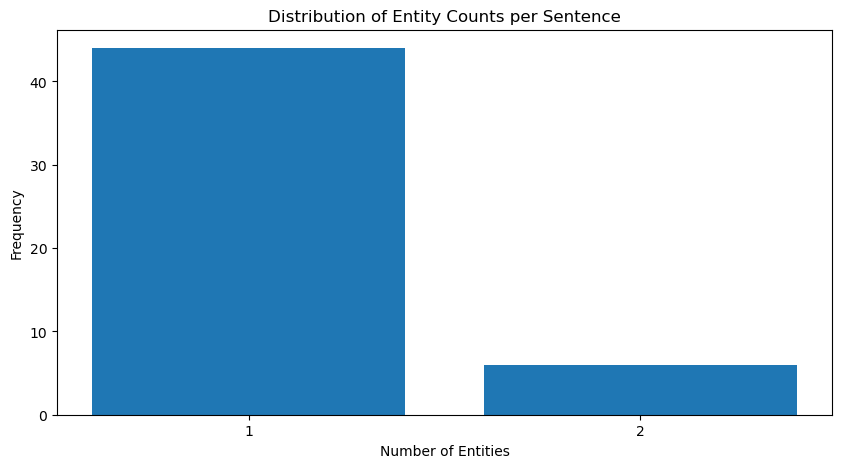

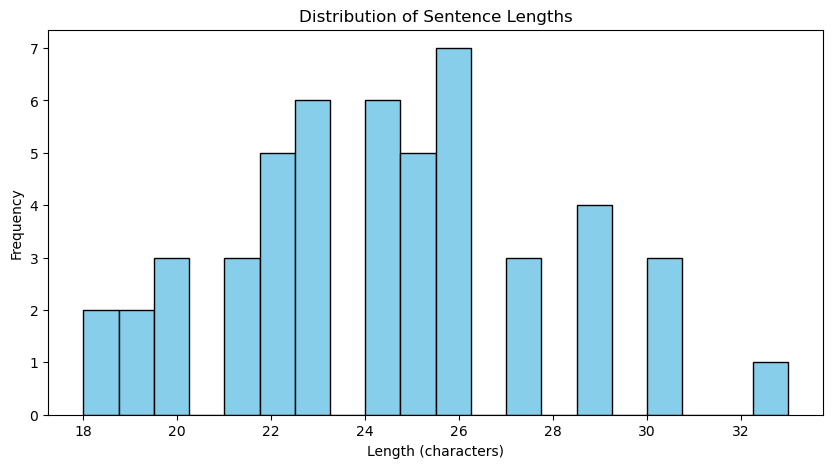

In [4]:
# Count entities per sentence
entity_counts = [len(example["entities"]) for example in ner_data]
entity_count_dist = Counter(entity_counts)

# Calculate sentence lengths (in characters)
sentence_lengths = [len(example["text"]) for example in ner_data]

# Plot entity count distribution
plt.figure(figsize=(10, 5))
plt.bar(entity_count_dist.keys(), entity_count_dist.values())
plt.title("Distribution of Entity Counts per Sentence")
plt.xlabel("Number of Entities")
plt.ylabel("Frequency")
plt.xticks(list(entity_count_dist.keys()))
plt.show()

# Plot sentence length distribution
plt.figure(figsize=(10, 5))
plt.hist(sentence_lengths, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Sentence Lengths")
plt.xlabel("Length (characters)")
plt.ylabel("Frequency")
plt.show()

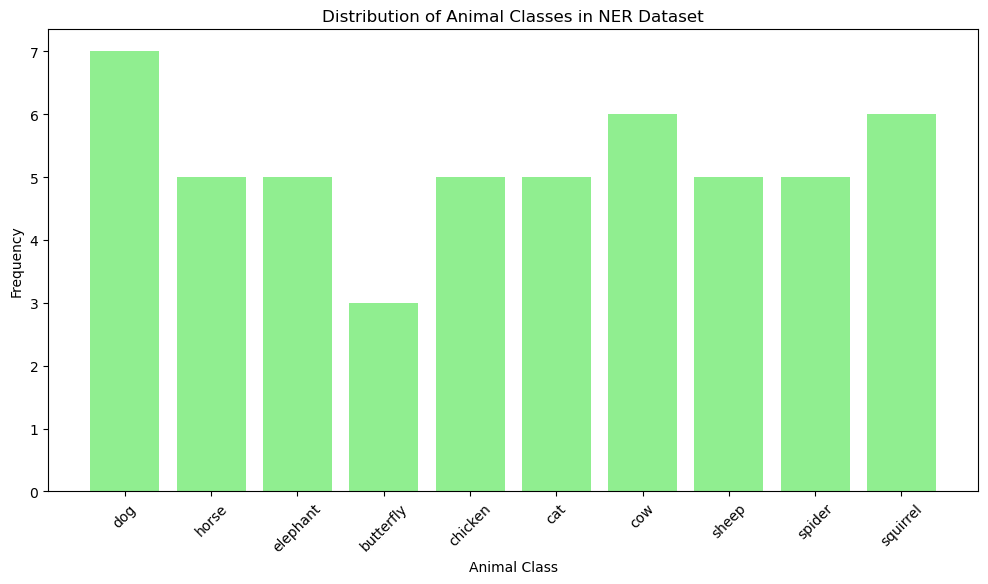

Animal class counts: {'dog': 7, 'horse': 5, 'elephant': 5, 'butterfly': 3, 'chicken': 5, 'cat': 5, 'cow': 6, 'sheep': 5, 'spider': 5, 'squirrel': 6}


In [5]:
# Extract animal names from entities
animal_names = []
for example in ner_data:
    for entity in example["entities"]:
        text = example["text"]
        animal = text[entity["start"]:entity["end"]].lower()
        animal_names.append(animal)

# Count occurrences of each animal
animal_dist = Counter(animal_names)

# Filter to match CLASS_NAMES (handle variations like "horses" vs "horse")
class_dist = {class_name: 0 for class_name in CLASS_NAMES}
for animal, count in animal_dist.items():
    base_name = animal.rstrip('s')  # Handle plural forms
    if base_name in CLASS_NAMES:
        class_dist[base_name] += count

# Plot animal class distribution
plt.figure(figsize=(12, 6))
plt.bar(class_dist.keys(), class_dist.values(), color='lightgreen')
plt.title("Distribution of Animal Classes in NER Dataset")
plt.xlabel("Animal Class")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

print("Animal class counts:", class_dist)

In [6]:
# Check for span errors
span_errors = 0
for example in ner_data:
    text = example["text"]
    for entity in example["entities"]:
        start, end = entity["start"], entity["end"]
        if end > len(text) or start < 0 or start >= end:
            span_errors += 1
            print(f"Error in: {text}, Span: {start}-{end}")

print(f"Number of span errors: {span_errors}")

Number of span errors: 0


Total number of images: 26179
Image counts per class: {'cane': 4863, 'cavallo': 2623, 'elefante': 1446, 'farfalla': 2112, 'gallina': 3098, 'gatto': 1668, 'mucca': 1866, 'pecora': 1820, 'ragno': 4821, 'scoiattolo': 1862}


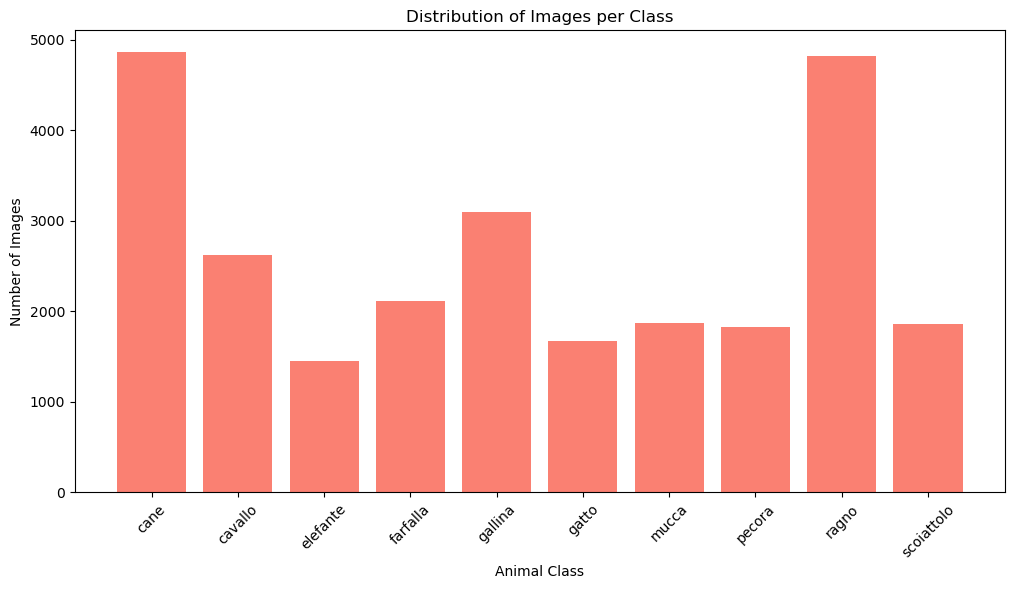

In [8]:
# Count images per class
image_counts = {}
classes = ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
for class_name in classes:
    class_path = os.path.join(IMAGE_DATA_PATH, class_name)
    if os.path.exists(class_path):
        image_counts[class_name] = len([f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))])
    else:
        image_counts[class_name] = 0
        print(f"Warning: No folder for {class_name}")

# Total images
total_images = sum(image_counts.values())
print(f"Total number of images: {total_images}")
print("Image counts per class:", image_counts)

# Plot image count distribution
plt.figure(figsize=(12, 6))
plt.bar(image_counts.keys(), image_counts.values(), color='salmon')
plt.title("Distribution of Images per Class")
plt.xlabel("Animal Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.show()

Sample image details:
cane: Size=(300, 300), Mode=RGB
cavallo: Size=(300, 213), Mode=RGB
elefante: Size=(300, 200), Mode=RGB


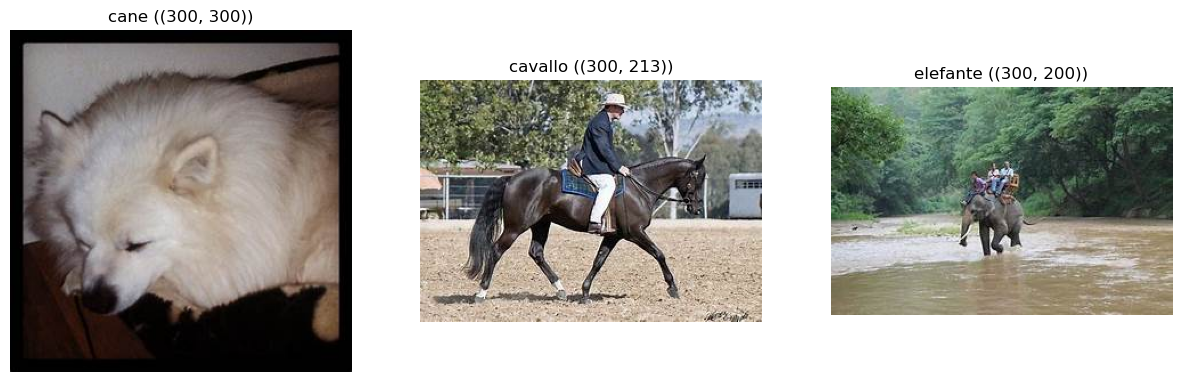

In [10]:
# Sample images for size and format analysis
sample_images = {}
for class_name in classes[:3]:  # Check first 3 classes as a sample
    class_path = os.path.join(IMAGE_DATA_PATH, class_name)
    if os.path.exists(class_path):
        files = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
        if files:
            img_path = os.path.join(class_path, files[0])
            with Image.open(img_path) as img:
                sample_images[class_name] = {"size": img.size, "mode": img.mode}

print("Sample image details:")
for class_name, details in sample_images.items():
    print(f"{class_name}: Size={details['size']}, Mode={details['mode']}")

# Plot sample images
plt.figure(figsize=(15, 5))
for i, (class_name, details) in enumerate(sample_images.items(), 1):
    img_path = os.path.join(IMAGE_DATA_PATH, class_name, os.listdir(os.path.join(IMAGE_DATA_PATH, class_name))[0])
    img = Image.open(img_path)
    plt.subplot(1, 3, i)
    plt.imshow(img)
    plt.title(f"{class_name} ({details['size']})")
    plt.axis('off')
plt.show()

In [11]:
# Check for corrupted images
corrupted_images = []
for class_name in CLASS_NAMES:
    class_path = os.path.join(IMAGE_DATA_PATH, class_name)
    if os.path.exists(class_path):
        for img_file in os.listdir(class_path):
            if img_file.endswith(('.jpg', '.jpeg', '.png')):
                try:
                    img_path = os.path.join(class_path, img_file)
                    with Image.open(img_path) as img:
                        img.verify()  # Verify image integrity
                except Exception as e:
                    corrupted_images.append(img_path)
                    print(f"Corrupted: {img_path}, Error: {e}")

print(f"Number of corrupted images: {len(corrupted_images)}")
if corrupted_images:
    print("Corrupted files:", corrupted_images)

Number of corrupted images: 0
